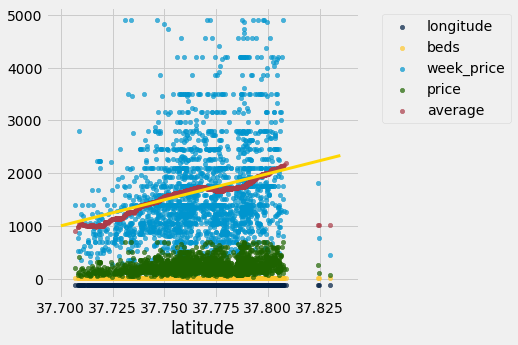

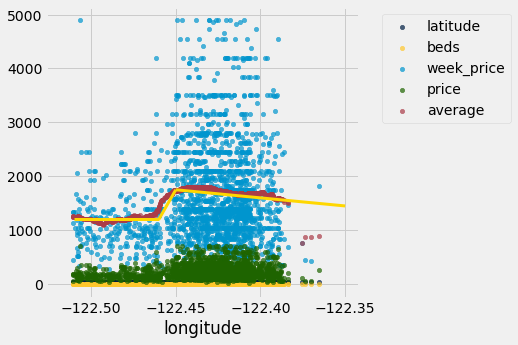

In [44]:
import copy

from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# we will first find the relationship between the latitude of the house and the price
# then we will do the same thing for the longtitude
# finally combine and get a final price
location_price = Table.read_table("geoloc.csv")
unit_price_review = Table.read_table('unit_price.csv')

# we will only take the rooms with 2 beds
price = unit_price_review.column("price")
location_price = location_price.with_column("price",price)
location_price = location_price.with_column("week_price", price*7)
location_price = location_price.where("beds", are.equal_to(2))
location_price = location_price.drop("neighbourhood_cleansed")
location_price = location_price.drop("zipcode")

# we need to take out the outliers
def no_outliers(table, col):
    average = np.mean(table.column(col))
    std = np.std(table.column(col))
    # only need 1.2 standard deviations
    # this covers roughly 76 percent of the graph if we assume the graph is normal
    return table.where(col, are.between(average-1.2*std,average+1.2*std))

location_price = no_outliers(location_price, "week_price")

# use the standard_units to find the correlation
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

def standardize(t):
    """Return a table in which all columns of t are converted to standard units."""
    t_su = Table()
    for label in t.labels:
        t_su = t_su.with_column(label + ' (su)', standard_units(t.column(label)))
    return t_su

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))


rlat = correlation(location_price, "latitude", "week_price")
rlong = correlation(location_price, "longitude", "week_price")
price_average = location_price.column("week_price").mean()
def predict_price(average):
    # Return a prediction of the average price for each bed
    close_points = location_price.where('latitude', are.between(average-0.01, average+0.01))
    return close_points.column('week_price').mean()

lat_price = location_price.with_column("average", location_price.apply(predict_price, 'latitude'))
lat_price.scatter("latitude")
plots.plot([37.700,37.835], [0*rlat+1000, 5000*rlat+1000], color='gold', lw=3)

def predict_price(average):
    # Return a prediction of the average price for each bed
    close_points = location_price.where('longitude', are.between(average-0.01, average+0.01))
    return close_points.column('week_price').mean()

long_price = location_price.with_column("average", location_price.apply(predict_price, 'longitude'))
long_price.scatter("longitude")
plots.plot([-122.51,-122.46], [1200, 1200], color='gold', lw=3)
plots.plot([-122.46,-122.45], [1200, 1750], color='gold', lw=3)
plots.plot([-122.45,-122.35], [1750, 1450], color='gold', lw=3)